# [Шпаргалка по визуализации данных в Python с помощью Plotly](https://habr.com/ru/post/502958/)

## Импорт


Для статического отображения графиков, необходимо установить `plotly orca`, вариант установки:

```
!pip install plotly>=4.7.1 > /dev/null
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4 > /dev/null
```

In [ ]:
import numpy as np
import pandas as pd

import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

## Общие настройки

`show_format = '' ` - интерактивный режим

`show_format = 'svg'` - статический режим

In [2]:
show_format = 'svg'

## Определение функций

In [3]:
x = np.arange(0, 5, 0.1)

def f(x):
    return x**2

def s(x):
    return np.sin(x)

def c(x):
    return np.cos(x)

def t(x):
    return np.tan(x)

# Раздельные графики

Фигура с несколькими графиками создаётся с помощью подмодуля `make_subplots`.

Необходимо указать количество:

* row — строк
* col — столбцов

А при построении графика передать «координаты» графика в этой «матрице» (сперва строка, потом столбец)


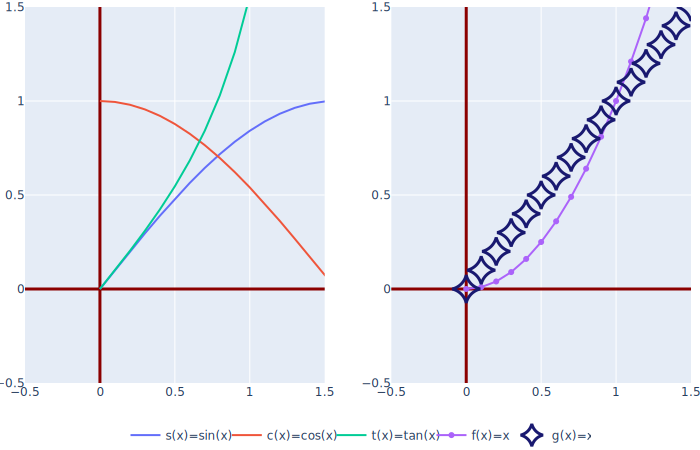

In [4]:
fig = make_subplots(rows=1, cols=2)

fig.update_yaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=3, 
                 zerolinecolor='DarkRed')
fig.update_xaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=3,
                 zerolinecolor='DarkRed')

fig.add_trace(go.Scatter(x=x, y=s(x), name='s(x)=sin(x)'), 1, 1)
fig.add_trace(go.Scatter(x=x, y=c(x), name='c(x)=cos(x)'), 1, 1)
fig.add_trace(go.Scatter(x=x, y=t(x), name='t(x)=tan(x)'), 1, 1)

fig.add_trace(go.Scatter(x=x, y=f(x), name='f(x)=x<sup>2</sup>',
                          mode='lines+markers'), 1, 2)
fig.add_trace(go.Scatter(x=x, y=x, name='g(x)=x', 
                          mode='markers', marker_symbol='star-diamond-open', 
                          marker=dict(color='MidNightBlue', size=20,
                                      line=dict(color='MediumPurple',
                                                width=3))), 1, 2)

fig.update_layout(legend_orientation='h', hovermode='x',
                  legend=dict(x=0.5, xanchor='center'),
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo='all',
                  hovertemplate='Аргумент: %{x}<bk>Функция: %{y}')
fig.show(show_format)

Настройка параметров для отдельного полотна.

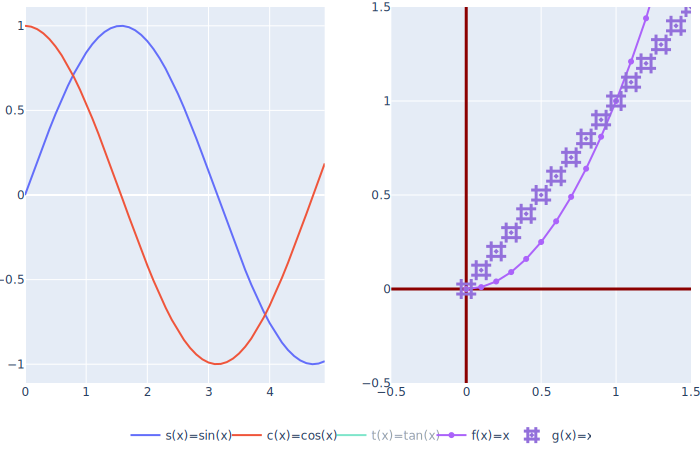

In [5]:
fig = make_subplots(rows=1, cols=2)

fig.update_yaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=3,
                 zerolinecolor='DarkRed', col=2)
fig.update_xaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=3,
                 zerolinecolor='DarkRed', col=2)

fig.add_trace(go.Scatter(x=x, y=s(x), name='s(x)=sin(x)'), 1, 1)
fig.add_trace(go.Scatter(x=x, y=c(x), name='c(x)=cos(x)'), 1, 1)
fig.add_trace(go.Scatter(x=x, y=t(x), name='t(x)=tan(x)',
                         visible='legendonly'), 1, 1)

fig.add_trace(go.Scatter(x=x, y=f(x), name='f(x)=x<sup>2</sup>', 
                         mode='lines+markers'), 1, 2)
fig.add_trace(go.Scatter(x=x, y=x, name='g(x)=x', 
                         mode='markers', marker_symbol='hash-dot',
                         marker=dict(color='MidNightBlue', size=20,
                                     line=dict(color='MediumPurple', 
                                               width=3))), 1, 2)
fig.update_layout(legend_orientation='h', hovermode='x',
                  legend=dict(x=0.5, xanchor='center'),
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo='all',
                  hovertemplate='Аргумент: %{x}<br>Функция: %{y}')
fig.show(show_format)

Создание осей к отдельному графику:

`update_axes(col=)`

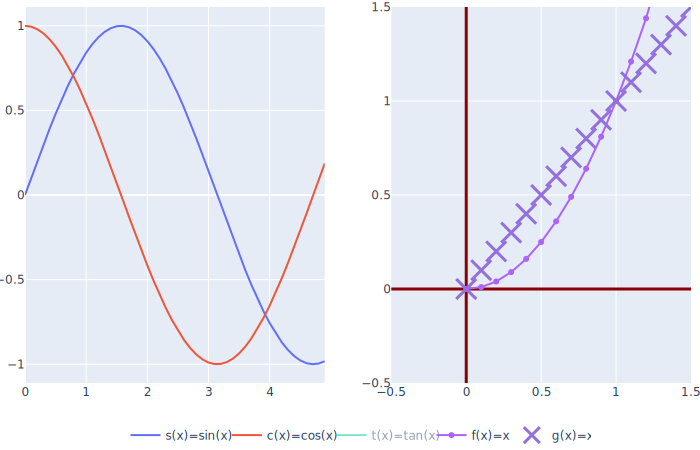

In [6]:
fig = make_subplots(rows=1, cols=2)

fig.update_xaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=3,
                 zerolinecolor='DarkRed', col=2)
fig.update_yaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=3,
                 zerolinecolor='DarkRed', col=2)

fig.add_trace(go.Scatter(x=x, y=s(x), name='s(x)=sin(x)'), 1, 1)
fig.add_trace(go.Scatter(x=x, y=c(x), name='c(x)=cos(x)'), 1, 1)
fig.add_trace(go.Scatter(visible='legendonly', 
                         x=x, y=t(x), name='t(x)=tan(x)'), 1, 1)

fig.add_trace(go.Scatter(x=x, y=f(x), name='f(x)=x<sup>2</sup>',
                         mode='lines+markers'), 1, 2)
fig.add_trace(go.Scatter(x=x, y=x, name='g(x)=x', 
                         mode='markers', marker_symbol='x-thin',
                         marker=dict(color='MidNightBlue', size=20,
                                     line=dict(color='MediumPurple',
                                               width=3))), 1, 2)

fig.update_layout(legend_orientation='h', hovermode='x',
                  legend=dict(x=0.5, xanchor='center'),
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo='all',
                  hovertemplate='Аргумент: %{x}<br>Функция%{y}')
fig.show(show_format)

Подписи к осям графика по умолчанию применяются к первому графику:

`fig.update_layout(xaxis_title='', yaxis_title='')`

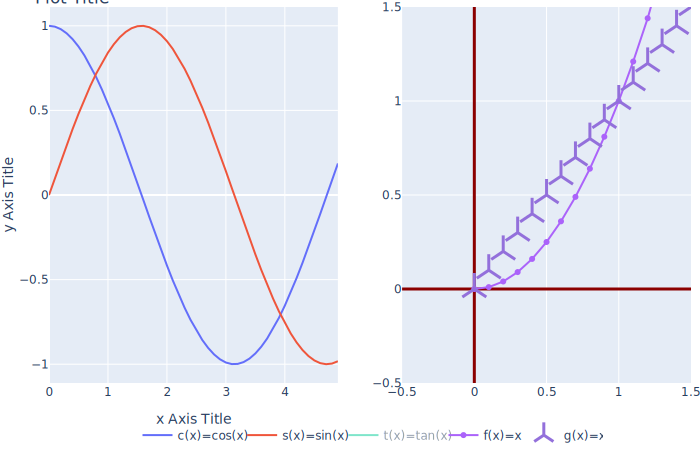

In [7]:
fig = make_subplots(rows=1, cols=2)

fig.update_xaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=3,
                 zerolinecolor='DarkRed', col=2)
fig.update_yaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=3,
                 zerolinecolor='DarkRed', col=2)

fig.add_trace(go.Scatter(x=x, y=c(x), name='c(x)=cos(x)'), 1, 1)
fig.add_trace(go.Scatter(x=x, y=s(x), name='s(x)=sin(x)'), 1, 1)
fig.add_trace(go.Scatter(x=x, y=t(x), name='t(x)=tan(x)',
                         visible='legendonly'), 1, 1)

fig.add_trace(go.Scatter(x=x, y=f(x), name='f(x)=x<sup>2</sup>', 
                         mode='lines+markers'), 1, 2)
fig.add_trace(go.Scatter(x=x, y=x, name='g(x)=x',
                         mode='markers', marker_symbol='y-up',
                         marker=dict(color='MidNightBlue', size=20,
                                     line=dict(color='MediumPurple',
                                               width=3))), 1, 2)
fig.update_layout(legend_orientation='h', hovermode='x',
                  legend=dict(x=0.5, xanchor='center'),
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_layout(title='Plot Title',
                  xaxis_title='x Axis Title',
                  yaxis_title='y Axis Title')
fig.update_traces(hoverinfo='all', 
                  hovertemplate='Аргумент: %{x}<br>Функция: %{y}')
fig.show(show_format)